In [1]:
from tensorflow.keras.datasets import mnist
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
(Xtr, Ytr), (Xte, Yte) =  mnist.load_data()

In [3]:
Xtr = torch.tensor(Xtr, dtype=torch.float32)
Ytr = torch.tensor(Ytr, dtype=torch.int64)
Xte = torch.tensor(Xte, dtype=torch.float32)
Yte = torch.tensor(Yte, dtype=torch.int64)
testDataSetSize = Xtr.shape[0]

In [4]:
m = Xtr.shape[1]
n = Xtr.shape[2]
image_size = m*n
X = Xtr.view(testDataSetSize, image_size)/256
Y = Ytr.view(testDataSetSize)
X.shape, Y.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [5]:
torch.manual_seed(2147483647)
features = 10
Weight = torch.randn(image_size, features)*0.3162 # 10 features and 3072 parameters
# tracking
lossi = []
# plt.imshow(torch.tensor(X[0]*255, dtype=torch.uint8).view(32,32,3))
X[torch.arange(10)].shape,Y[torch.arange(10)].shape
Weight.requires_grad_(True);
Weight.shape

torch.Size([784, 10])

In [6]:
# lrs = 10**np.linspace(-5, 0, num=1000) 0.23 and 0.9
batches = 36
for count in range(100_00):
    ix = torch.randint(0, X.shape[0], size=(batches, ))
    xb = X[ix]
    yb = Y[ix]
    l = xb @ Weight
    # TODO: not working the manual loss
    c = l.exp()
    probs = c/c.sum(dim=1, keepdim=True)
    loss = -torch.log(probs[torch.arange(batches), yb]).mean()
    lossi.append(loss.item())
    Weight.grad = None
    
    loss.backward()
    if count%10_000 == 0:
        print(loss)
    lr = (0.1 if count < 70_000 else 0.01)

    Weight.data += -lr*Weight.grad
    count+=1

tensor(6.0848, grad_fn=<NegBackward0>)


In [7]:
# loss over all the traning
X = torch.tensor(Xtr, dtype=torch.float32).reshape(-1, image_size)/256
Y = torch.tensor(Ytr).view(-1)
l = (X@Weight)
loss = torch.nn.functional.cross_entropy(l, Y)
loss

C:\Users\imona\AppData\Local\Temp\ipykernel_10916\2010985876.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(Xtr, dtype=torch.float32).reshape(-1, image_size)/256
C:\Users\imona\AppData\Local\Temp\ipykernel_10916\2010985876.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Ytr).view(-1)


tensor(0.2985, grad_fn=<NllLossBackward0>)

In [8]:
# test on all data!
X = torch.tensor(Xte, dtype=torch.float32).reshape(-1, image_size)/256
Y = torch.tensor(Yte).view(-1)
l = (X@Weight)
loss = torch.nn.functional.cross_entropy(l, Y)
loss

C:\Users\imona\AppData\Local\Temp\ipykernel_10916\3005372274.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(Xte, dtype=torch.float32).reshape(-1, image_size)/256
C:\Users\imona\AppData\Local\Temp\ipykernel_10916\3005372274.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Yte).view(-1)


tensor(0.3011, grad_fn=<NllLossBackward0>)

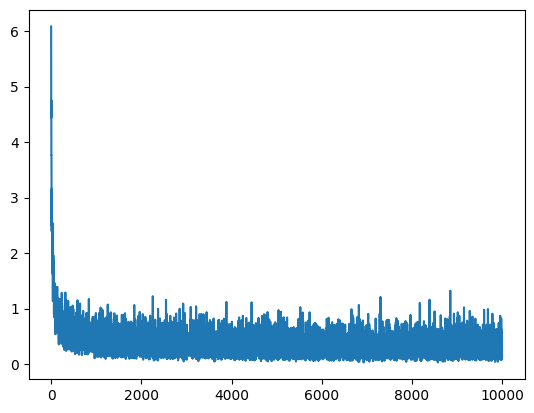

In [9]:
plt.plot(lossi)

C:\Users\imona\AppData\Local\Temp\ipykernel_10916\512550410.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = (torch.tensor((p*256).clone().detach(), dtype=torch.uint8))


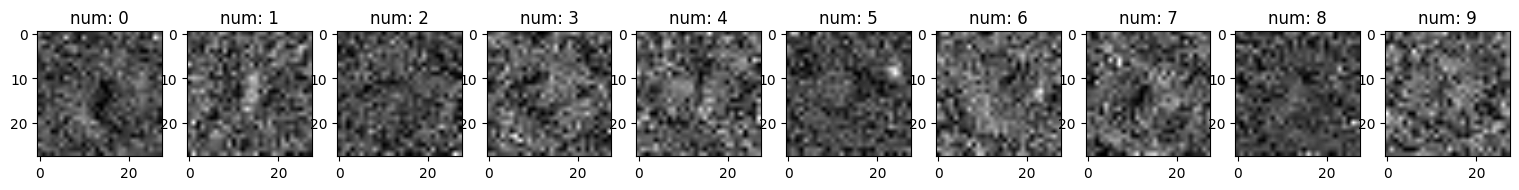

In [37]:
i = 1
plt.figure(figsize=(19, 18))
for _ in range(10):
    W = Weight[:, i-1].view(m, n)
    # Min_max
    Weight_min = W.min(dim=1, keepdim=True)[0].min(dim=1, keepdim=True)[0]
    Weight_max = W.max(dim=1, keepdim=True)[0].max(dim=1, keepdim=True)[0]
    Weight_normalized = (W - Weight_min) / (Weight_max - Weight_min)
    c = Weight_normalized

    # use min-max
    # normalizing the pixels
    p = c/c.sum(1, keepdim=True)
    img = (torch.tensor((p*256).clone().detach(), dtype=torch.uint8))
    plt.subplot(1, 10, i)
    plt.title(f"num: {i-1}")
    plt.imshow(img, interpolation='bilinear', cmap="grey")
    i += 1

C:\Users\imona\AppData\Local\Temp\ipykernel_10916\2808114415.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(l)
C:\Users\imona\AppData\Local\Temp\ipykernel_10916\2808114415.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(x*255, dtype=torch.uint8).view(m, n), cmap="grey", interpolation="bilinear")


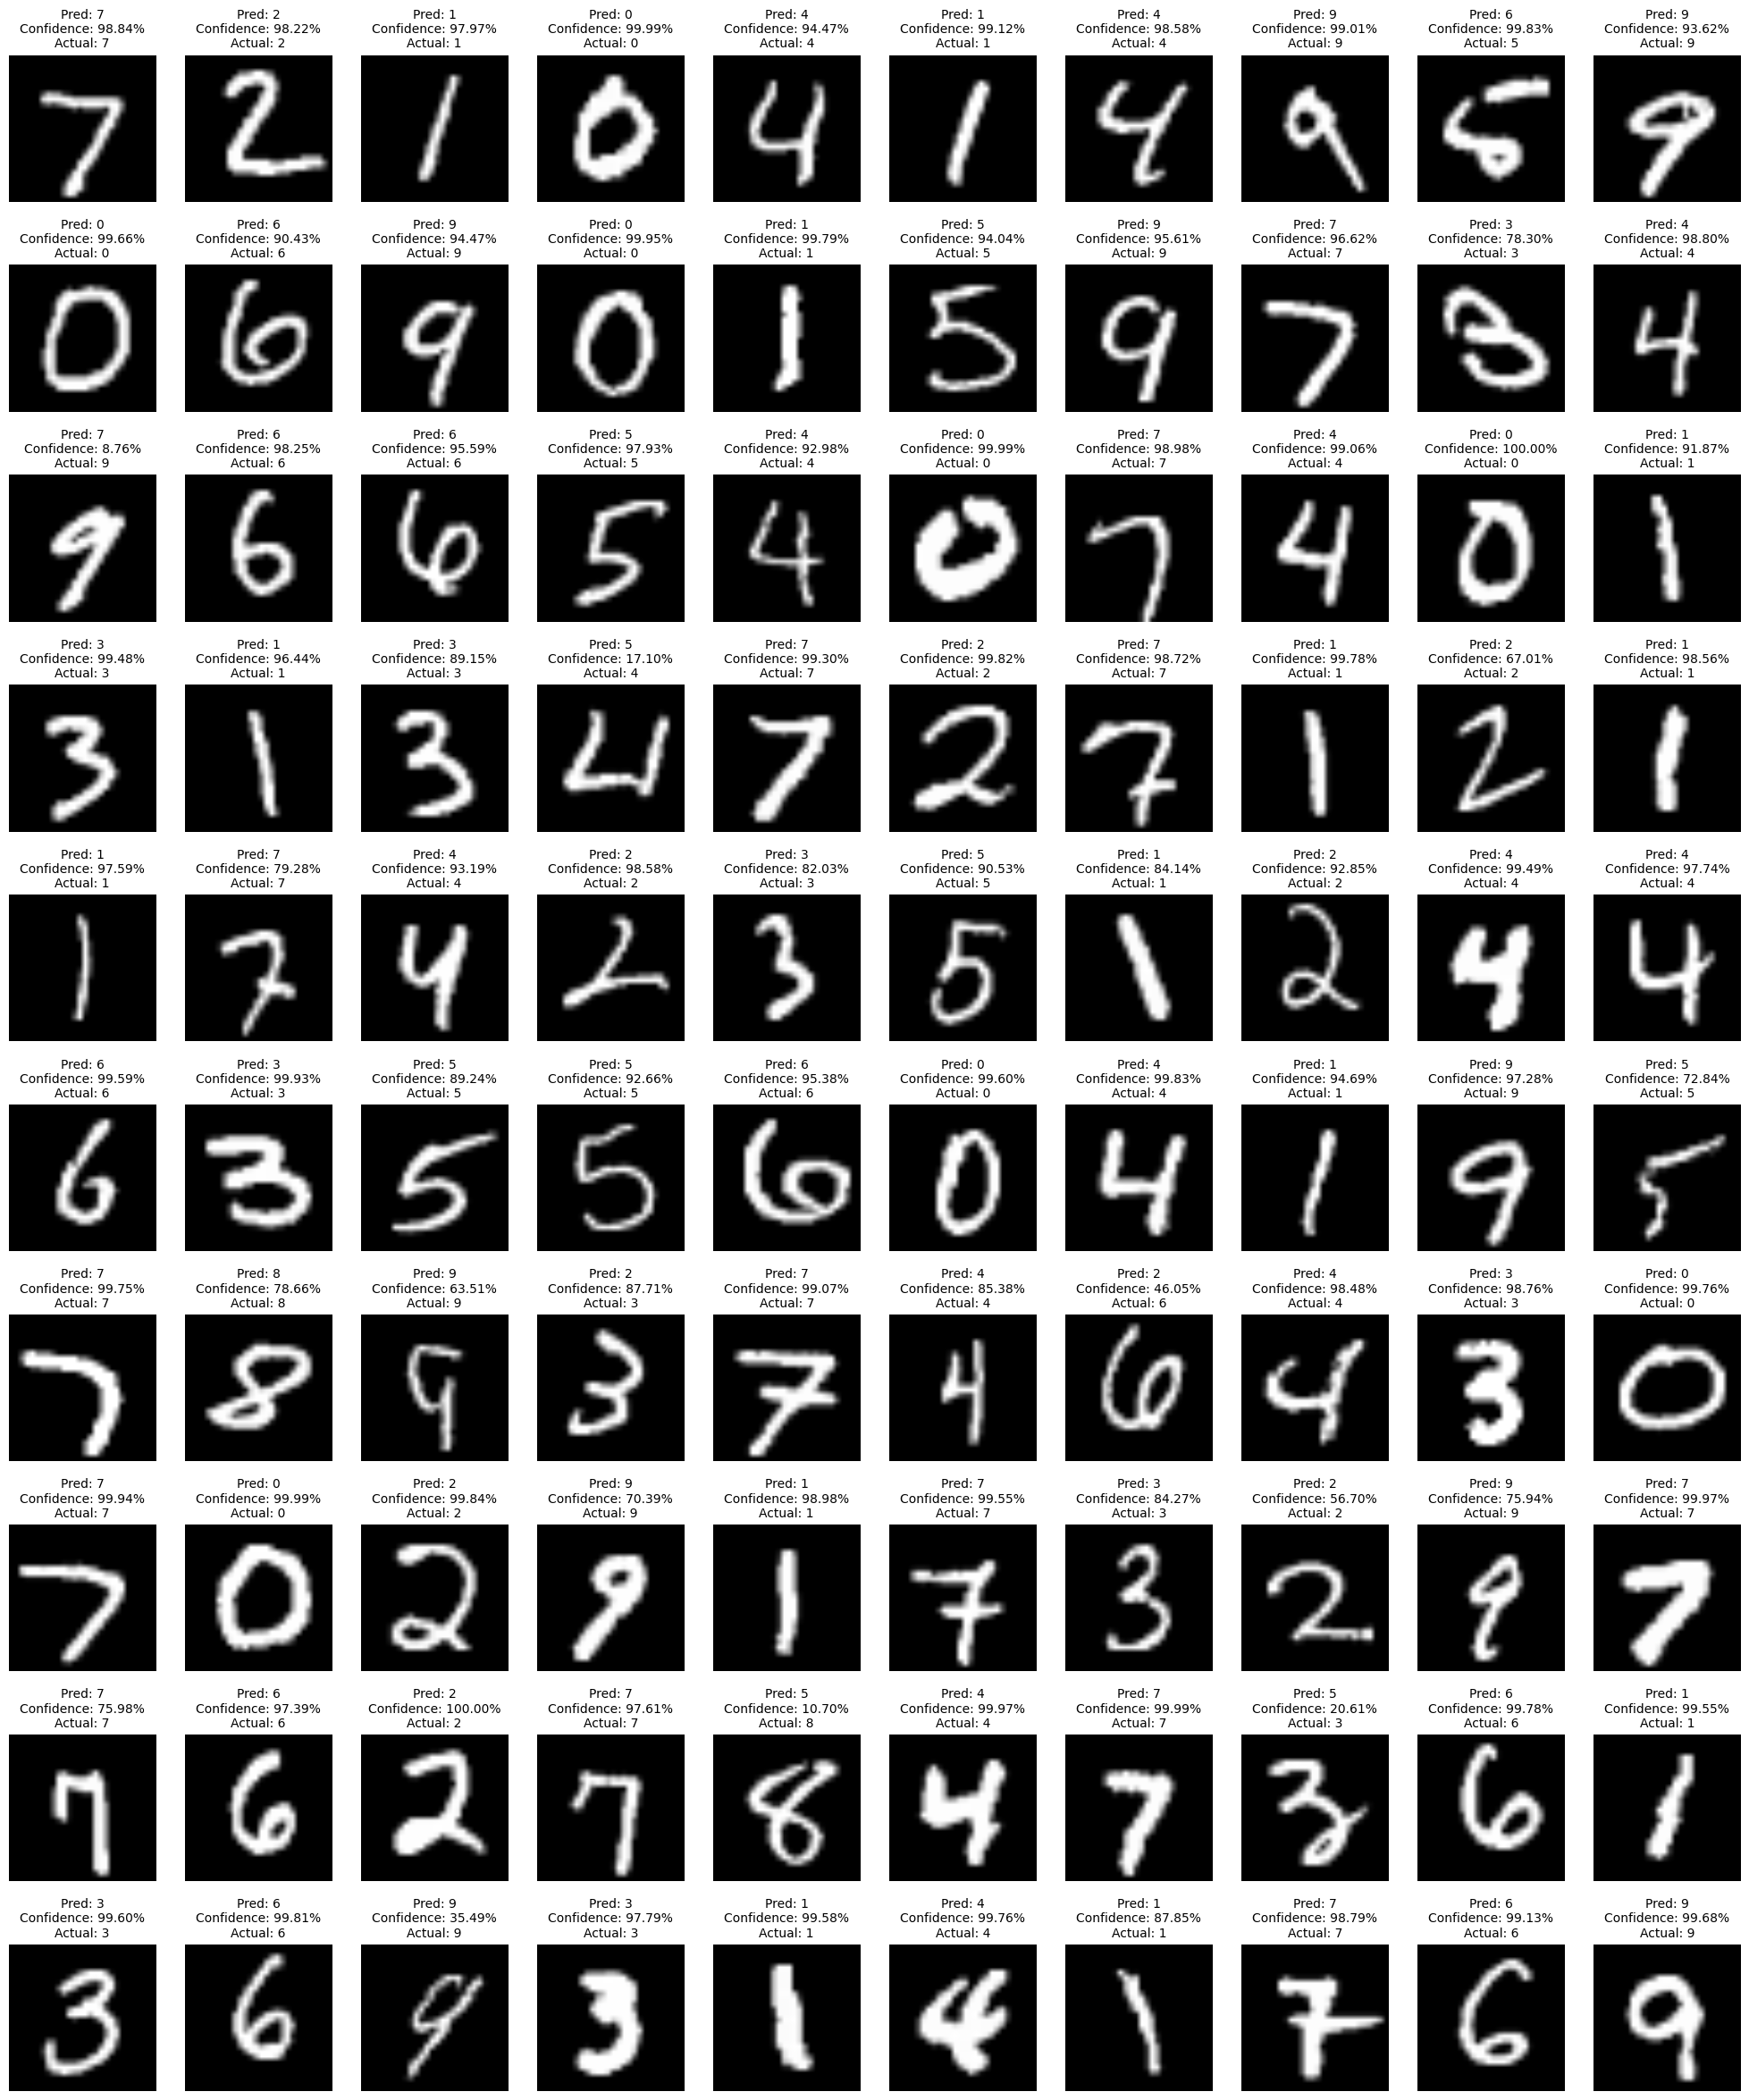

Accuracy: 93.0%
Correcet Guessed: 93


In [11]:
count = 1
images_count = 100

xte = torch.Tensor(Xte[:images_count]).reshape(-1, image_size)/256
scalex = 5
scaley = 10
correct = 0
plt.figure(figsize=(5*scalex, 3*scaley))
for x, y in zip(xte, Yte[:images_count]):
    l = (x @ Weight)
    probs = torch.nn.functional.softmax(l)
    plt.subplot(images_count//10, 10, count)
    pred = torch.multinomial(probs, 1).item()
    if pred == y:
        correct += 1
    plt.title(f"Pred: {pred}\nConfidence: {probs[pred]*100:.2f}%\nActual: {y}", size=10)
    plt.axis("off")
    count+=1
    plt.imshow(torch.tensor(x*255, dtype=torch.uint8).view(m, n), cmap="grey", interpolation="bilinear")
plt.savefig("Main.png")
plt.show()
print(f"Accuracy: {(correct*100)/images_count}%")
print(f"Correcet Guessed: {correct}")